# There are a large number of features in this data set and in order to create a good prediction there will have to be a fair amount of work to do in advance. Combining the train and test set will means changes only need to be done once across both data sets. We will be exploring the following steps:
    Correlation
    Feature Exploration
    Missing Values
    Data Normilization
    Feature Engineering
    Assembling dataset
    Prediction

In [5]:

from sklearn.impute import SimpleImputer

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Normalizer, scale, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline


# Data Reading

In [6]:
traindf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/train.csv")
testdf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/test.csv")

# create a single dataframe of both the training and testing data

In [74]:
wholedf = pd.concat([traindf,testdf])

In [8]:
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
wholedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


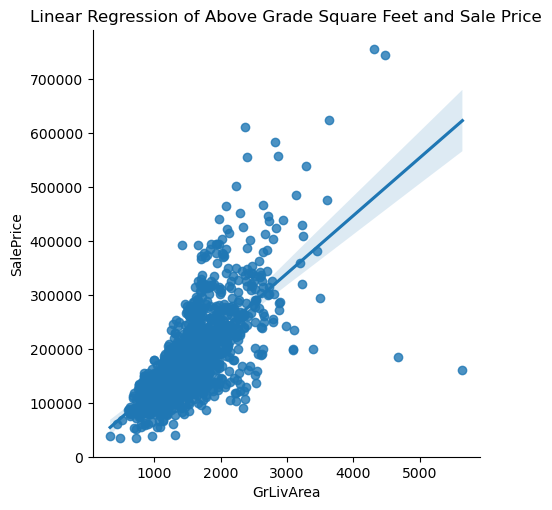

In [10]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.title("Linear Regression of Above Grade Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

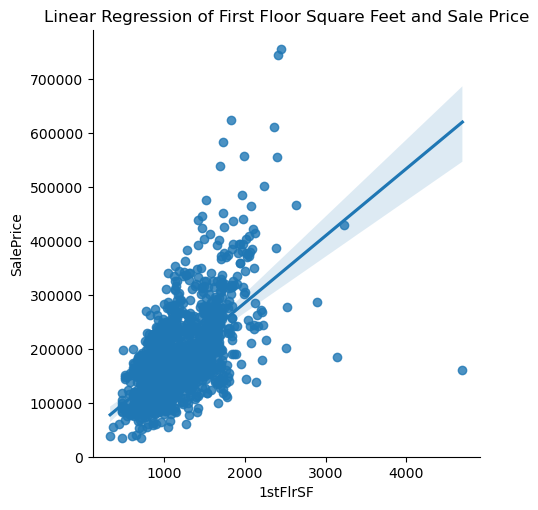

In [11]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=wholedf);
plt.title("Linear Regression of First Floor Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

# Correlation
# A quick correlation check is the best way to the heart of the data set. There is a far amount of correlation for sales price with a couple of variables:

In [12]:
traincorr = traindf.corr()['SalePrice']
# convert series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)
# correct column label from SalePrice to correlation
traincorr.columns = ["Correlation"]
# sort correlation
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

C:\Users\G good\AppData\Local\Temp\ipykernel_20116\2392283251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traincorr = traindf.corr()['SalePrice']


,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


C:\Users\G good\AppData\Local\Temp\ipykernel_20116\555157079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wholedf.corr()


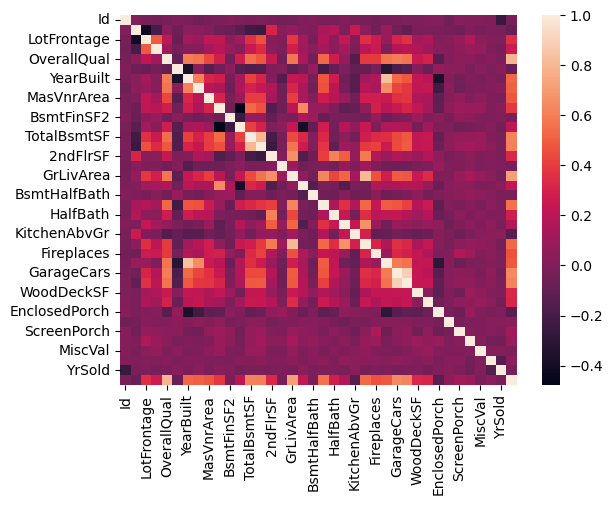

In [14]:
corr = wholedf.corr()
sns.heatmap(corr)
plt.show()

# Missing Values
# There is a wide selection of missing values. 
# First it make sense to hit the low hanging fruit first and deal with those that are missing a values, 
# Second work through what is left. Some of these look to be missing values not because they don’t have data but rather because the building was missing that feature, like a garage. Using Pandas Get.Dummies will sort that problem out into true/false values

In [15]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(36)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


# Replacing Missing Values
# For the categorical information that is missing a single values a quick check shows which ones are dominant and manually replace the missing values. 

In [18]:
#wholedf[["Utilities", "Id"]].groupby(['Utilities'], as_index=False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")

# wholedf[["Electrical", "Id"]].groupby(['Electrical'], as_index=False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")

# wholedf[["Exterior1st", "Id"]].groupby(['Exterior1st'], as_index=False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")

#wholedf[["Exterior2nd", "Id"]].groupby(['Exterior2nd'], as_index=False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")

In [19]:
# Missing interger values replace with the median in order to return an integer
wholedf['BsmtFullBath']= wholedf.BsmtFullBath.fillna(wholedf.BsmtFullBath.median())
wholedf['BsmtHalfBath']= wholedf.BsmtHalfBath.fillna(wholedf.BsmtHalfBath.median())
wholedf['GarageCars']= wholedf.GarageCars.fillna(wholedf.GarageCars.median())

# Missing float values were replaced with the mean for accuracy 
wholedf['BsmtUnfSF']= wholedf.BsmtUnfSF.fillna(wholedf.BsmtUnfSF.mean())
wholedf['BsmtFinSF2']= wholedf.BsmtFinSF2.fillna(wholedf.BsmtFinSF2.mean())
wholedf['BsmtFinSF1']= wholedf.BsmtFinSF1.fillna(wholedf.BsmtFinSF1.mean())
wholedf['GarageArea']= wholedf.GarageArea.fillna(wholedf.GarageArea.mean())
wholedf['MasVnrArea']= wholedf.MasVnrArea.fillna(wholedf.MasVnrArea.mean())

# Some of the missing values can be inferred from other values for that given property. 
# The GarageYearBuilt would have to be at the earliest the year the house was built. 
# Likewise TotalBasementSQFeet would have to be equal to the first floor square footage.

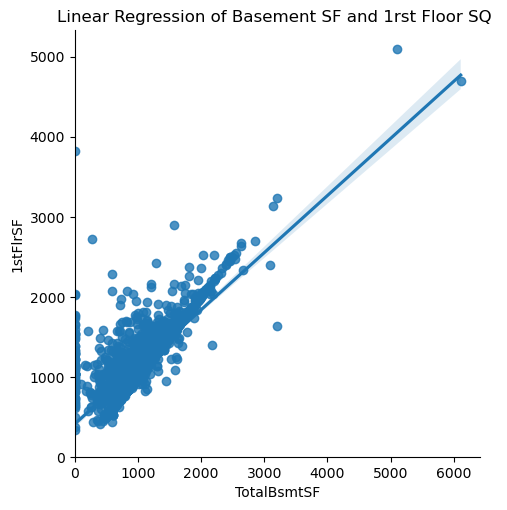

In [20]:
wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
wholedf.TotalBsmtSF.fillna(wholedf['1stFlrSF'], inplace=True)
sns.lmplot(x="TotalBsmtSF", y="1stFlrSF", data=wholedf)
plt.title("Linear Regression of Basement SF and 1rst Floor SQ ")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

# Lot Frontage
# Lot Frontage is a bit trickier. There are 486 missing values (17% of total values) but a quick check of correlation shows that there are surprisingly few features that have high correlation outside of Lot Area.

In [21]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

LotArea              0.489896
LotFrontage          1.000000
LotConfig_Corner     0.257028
LotConfig_CulDSac   -0.104612
LotConfig_FR2       -0.056992
LotConfig_FR3        0.027509
LotConfig_Inside    -0.162484
LotShape_IR1         0.151502
LotShape_IR2        -0.011356
LotShape_IR3         0.139550
LotShape_Reg        -0.164639
Name: LotFrontage, dtype: float64

# Logic dictates that the Lot Area should have a linear relation to Lot Frontage. A quick check with a linear regression of the relationship between Lot Frontage and the square root of Lot Area (or effectively one side) shows we are in the ballpark.

In [24]:
lot["LotAreaUnSq"] = np.sqrt(lot['LotArea'])

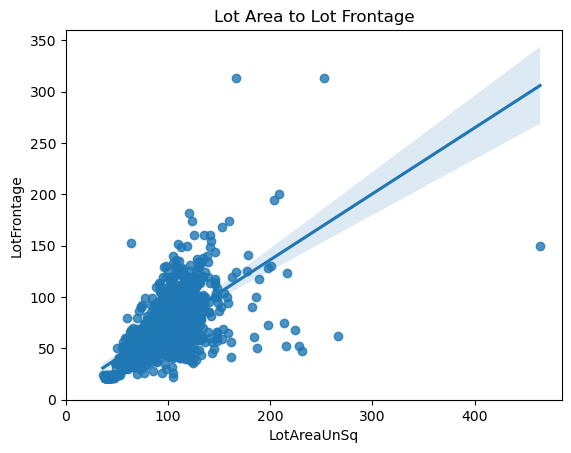

In [23]:
sns.regplot(x="LotAreaUnSq", y="LotFrontage", data=lot);
plt.xlim(0,)
plt.ylim(0,)
plt.title("Lot Area to Lot Frontage")
plt.show()

In [25]:
# Remove all lotfrontage is missing values
lot = lot[lot['LotFrontage'].notnull()]
# See the not null values of LotFrontage
lot.describe()['LotFrontage']

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# Once the missing values are filled in, it is good to confirm that the distribution did not go way out of wack. The blue is the original distribution, the green is the new one with missing values inferred and the red is the curve of the square root of lot area. I looks like a majority of these properties unsurprisingly do not have perfectly square lots but for our purposes, everything looks good.

In [26]:
wholedf['LotFrontage']= wholedf.LotFrontage.fillna(np.sqrt(wholedf.LotArea))
wholedf['LotFrontage']= wholedf['LotFrontage'].astype(int)

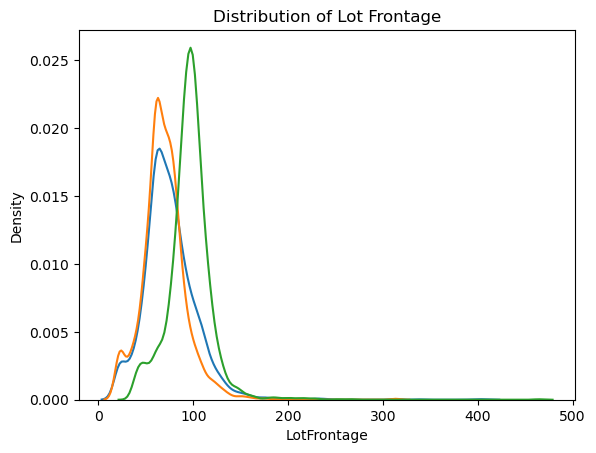

In [27]:
# Distribution of values after replacement of missing frontage
sns.kdeplot(wholedf['LotFrontage']);
sns.kdeplot(lot['LotFrontage']);
sns.kdeplot(lot['LotAreaUnSq']);
plt.title("Distribution of Lot Frontage")
plt.show()

In [28]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(3)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169


# Feaure Engineering

# Now to create some new features and see how they can help the model’s accuracy. First are a couple of macro creations, like adding all the internal and external square footage together to get the total living space including both floors, garage and external spaces.

In [30]:
Livingtotalsq = wholedf['TotalBsmtSF'] + wholedf['1stFlrSF'] + wholedf['2ndFlrSF'] + wholedf['GarageArea'] + wholedf['WoodDeckSF'] + wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

# Total Living Area divided by LotArea
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF'] / wholedf['LotArea']

# Total count of all bathrooms including full and half through the entire building
wholedf['TotalBaths'] = wholedf['BsmtFullBath'] + wholedf['BsmtHalfBath'] + wholedf['HalfBath'] + wholedf['FullBath']

# Percentage of total rooms are bedrooms
wholedf['PercentBedrmtoRooms'] = wholedf['BedroomAbvGr'] / wholedf['TotRmsAbvGrd']

# Number of years since last remodel, if there never was one it would be since it was built
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

# Total Square Footage

# There is a minimal increase of the Condition Rating to square foot, which is not a surprise. However when a linear regression with the Sale Price is taken instead a much more obvious pattern emerges.


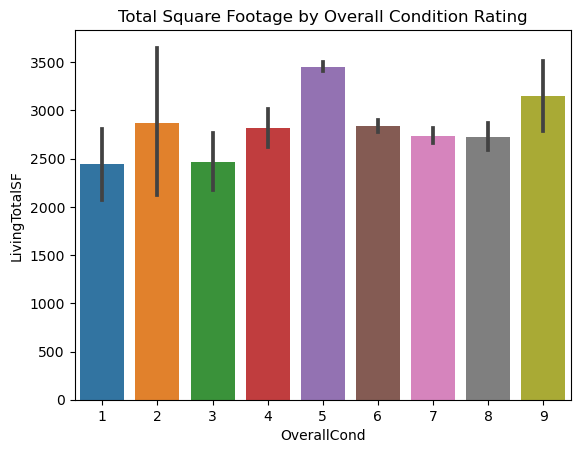

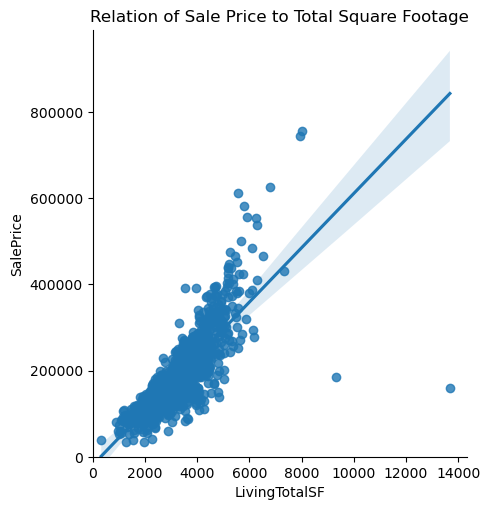

In [31]:
sns.barplot(x="OverallCond", y="LivingTotalSF", data=wholedf)
plt.title("Total Square Footage by Overall Condition Rating")
plt.show()

sns.lmplot(x="LivingTotalSF", y="SalePrice", data=wholedf)
plt.title("Relation of Sale Price to Total Square Footage")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

# Total Rooms

# Conversely if rooms were what interested you, there is a pronounced relationship between rooms and the number of bathrooms. This is the mean of bathrooms and the line is the variance (how much from the average most values deviate).


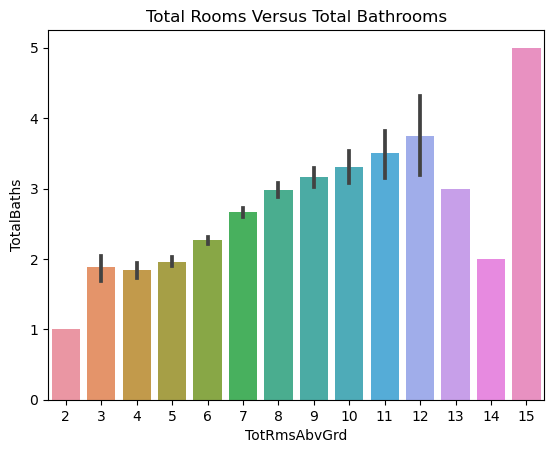

In [32]:
ax = sns.barplot(x="TotRmsAbvGrd", y="TotalBaths",data=wholedf)
plt.title("Total Rooms Versus Total Bathrooms")
plt.show()

#  Sale Month

# Once last colorful graph before wrapping this up. I have wondered this about the Vermont housing market as the weather can have a large impact on many activities, including looking at houses I would imagine.


C:\Users\G good\anaconda33\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\G good\anaconda33\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\G good\anaconda33\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\G good\anaconda33\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\G good\anaconda33\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.6% of 

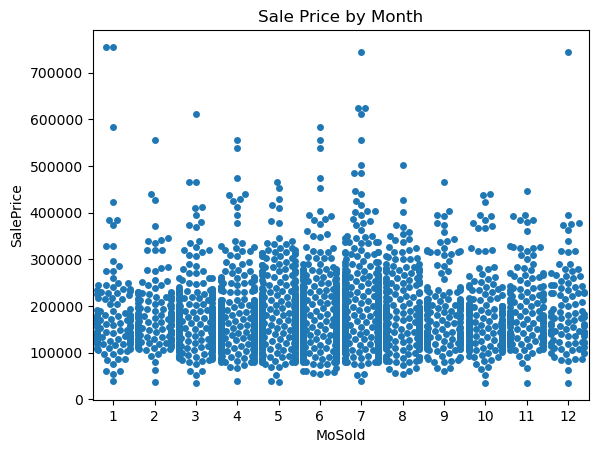

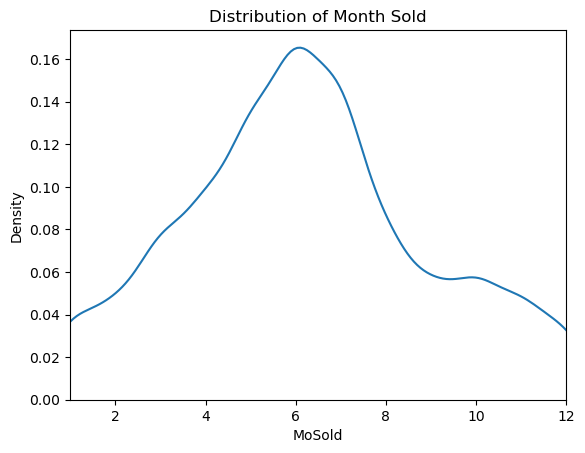

In [35]:
sns.swarmplot(x="MoSold", y="SalePrice", data=wholedf)
plt.title("Sale Price by Month")
plt.show()

sns.kdeplot(wholedf['MoSold']);
plt.title("Distribution of Month Sold")
plt.xlim(1,12)
plt.show()

# Neighborhoods

# All of us know that neighborhoods have a wide variety of characteristics. In some ways there is a relationship to sale price, but it is harder to define and less useful in prediction.

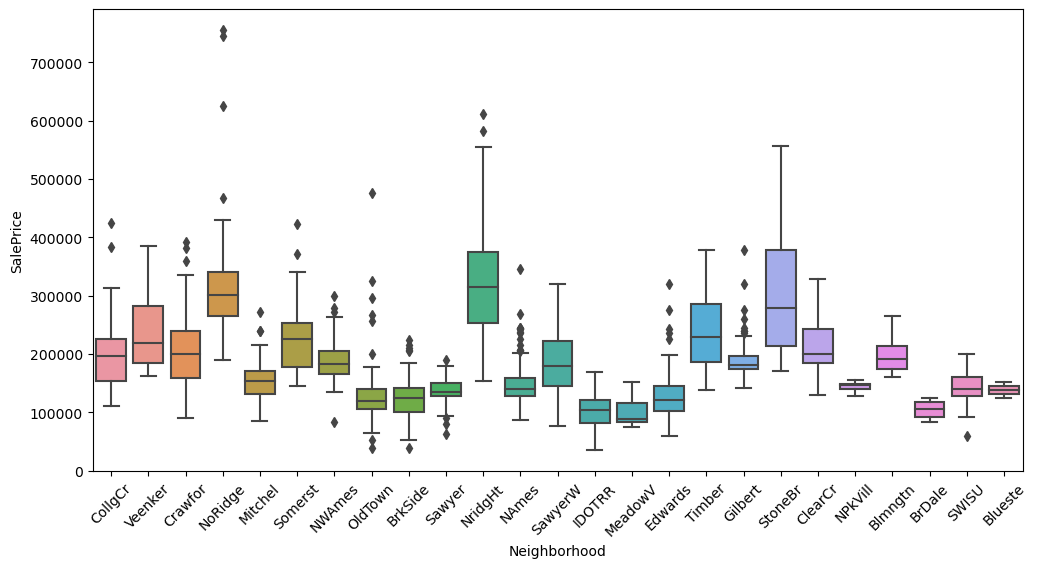

In [36]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = wholedf)
plt.xticks(rotation=45)
plt.show()

# Categorical Conversion

# In order for the model to understand categories, first replace all the categorical data with boolean values through Pandas get_dummies.


In [38]:
wholedf = pd.get_dummies(wholedf)
traincorr = wholedf.corr()['SalePrice']
# convert series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)
# correct column label from SalePrice to correlation
traincorr.columns = ["Correlation"]
# sort correlation
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
LivingTotalSF,0.815688
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
TotalBaths,0.613005
1stFlrSF,0.605852
FullBath,0.560664


# Split Database

# Time to split the database back into two parts, one with sales price and one without

In [40]:
train_X = wholedf[wholedf['SalePrice'].notnull()]
del train_X['SalePrice']
test_X =  wholedf[wholedf['SalePrice'].isnull()]
del test_X['SalePrice']
print("Length of train_X:", len(train_X))
print("Length of test_X:", len(test_X))

Length of train_X: 1460
Length of test_X: 1459


# Training/Test Dataset

# Create training set assembly

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
traindf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/train.csv")
testdf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/test.csv")

# Extract features (X) and target variable (y) from the training dataset
X = traindf.drop(columns=['Id', 'SalePrice'])  # Remove 'Id' and 'SalePrice' columns
y = traindf['SalePrice']

# Split the data into training, validation, and test sets
train_X, temp_X, train_y, temp_y = train_test_split(X, y, train_size=0.7, random_state=42)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, train_size=0.5, random_state=42)

# Display the shapes of the datasets
print("Shape of train_X:", train_X.shape)
print("Shape of valid_X:", valid_X.shape)
print("Shape of test_X:", test_X.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of valid_y:", valid_y.shape)
print("Shape of test_y:", test_y.shape)


Shape of train_X: (1021, 79)
Shape of valid_X: (219, 79)
Shape of test_X: (220, 79)
Shape of train_y: (1021,)
Shape of valid_y: (219,)
Shape of test_y: (220,)


# Model

# Here are a variety of models you can try, many performed extremely poorly, Lasso was the best but I plan to go back to this and do further work on refining my features, like log regressions and normalizations.


In [60]:
# model = RandomForestRegressor()
model = Ridge()
# model = LassoLarsCV()
# Models that performed substantially worse
# model = LinearSVC()
# model = KNeighborsClassifier(n_neighbors = 3)
# model = GaussianNB()
# model = LogisticRegression()
# model = SVC()

# Accurancy

In [88]:
from sklearn.impute import SimpleImputer

# Load your datasets
traindf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/train.csv")
testdf = pd.read_csv("C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass2/test.csv")

# Extract features (X) and target variable (y) from the training dataset
X = traindf.drop(columns=['Id', 'SalePrice'])
y = traindf['SalePrice']

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X)

# Handle missing values using an imputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies too
X_imputed = imputer.fit_transform(X)

# Split the data
train_X, valid_X, train_y, valid_y = train_test_split(X_imputed, y, train_size=0.7, random_state=42)

# Create and train the model
model = Ridge()
model.fit(train_X, train_y)

# Print R^2 scores for training and validation sets
train_r2 = model.score(train_X, train_y)
valid_r2 = model.score(valid_X, valid_y)
print("Training Set R^2 Score:", train_r2)
print("Validation Set R^2 Score:", valid_r2)


Training Set R^2 Score: 0.9236934941674302
Validation Set R^2 Score: 0.8834718184865327
